In [1]:
import numpy as np
from sklearn.datasets import make_sparse_coded_signal
from sklearn.decomposition import DictionaryLearning
import matplotlib.pyplot as plt
from transphorm.model_components import SyntheticTSDataModule

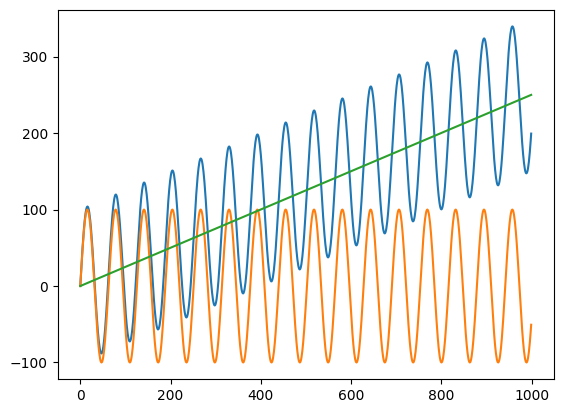

In [78]:
x = np.linspace(0,1000, 1000)
y= np.linspace(0,1000,1000)
m = 0.25
b = 0
x_line = m*x+b
sin_x = 100*np.sin(x/10)
combo = x_line+sin_x
combo = combo.reshape(-1,1)
plt.plot(combo)
plt.plot(sin_x)
plt.plot(x_line)


In [3]:
data_module = SyntheticTSDataModule(batch_size=64)
data_module.prepare_data()
data_module.setup('train')
train = data_module.train.dataset.tensors[0].detach().numpy()
train[:100, ::100].shape
# plt.plot(train[1])

(100, 50)

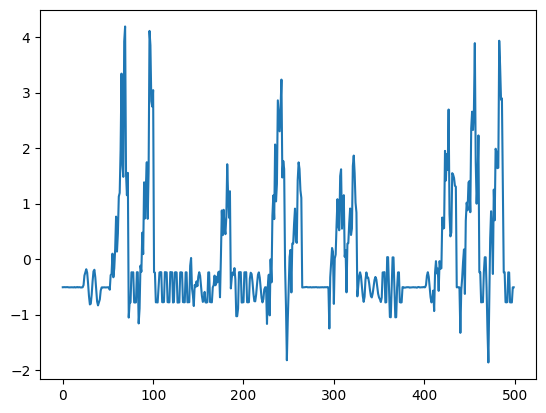

In [7]:
data = train[:100, ::10]
plt.plot(data[0])

In [80]:
dict_learner = DictionaryLearning(n_components=4,
                                  positive_code=True, 
                                  positive_dict=True,
                                  transform_algorithm='lasso_cd',
                                  fit_algorithm='cd',
                                  random_state=42)
codes = dict_learner.fit_transform(data)



In [81]:
X_hat = codes @ dict_learner.components_

ValueError: x and y must be the same size

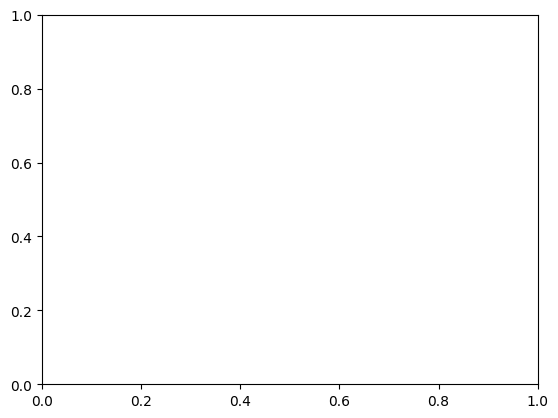

ValueError: x and y must be the same size

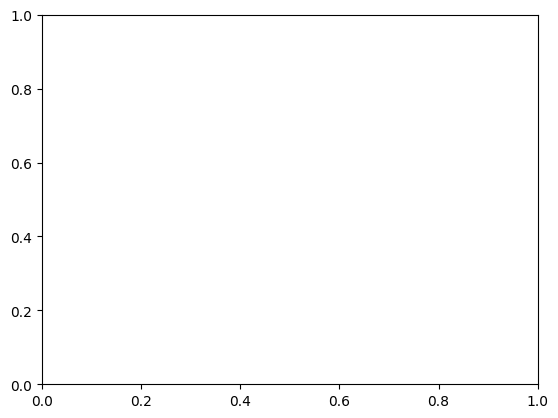

In [104]:
plt.scatter( [0,1,2,3], codes.T)

In [90]:
X_hat[0].shape

(500,)

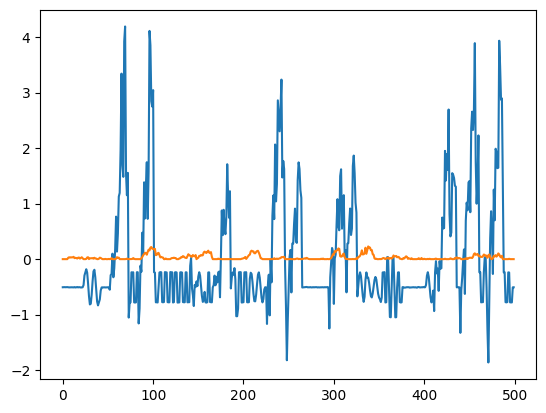

In [88]:

plt.plot(train[0][::10])


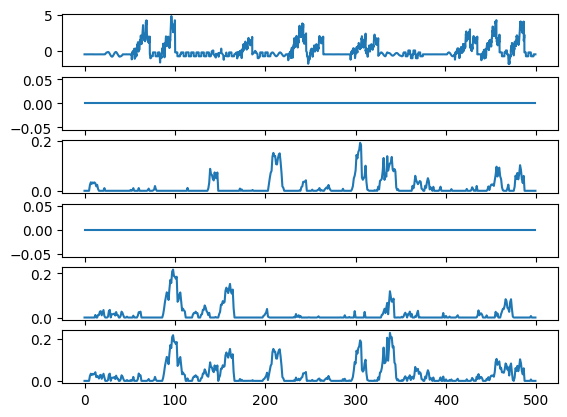

In [85]:


fig, ax = plt.subplots(nrows = 6)

ax[0].plot(train[0])
for i in range(0,4):
    ax[i+1].plot(basis_0[i])
ax[5].plot(X_hat[0])

In [56]:
X, dictionary, code = make_sparse_coded_signal(
    n_samples=30, n_components=15, n_features=20, n_nonzero_coefs=10,
    random_state=42,
)

In [68]:
dict_learner = DictionaryLearning(n_components=15)
x_trans = dict_learner.fit_transform(X)

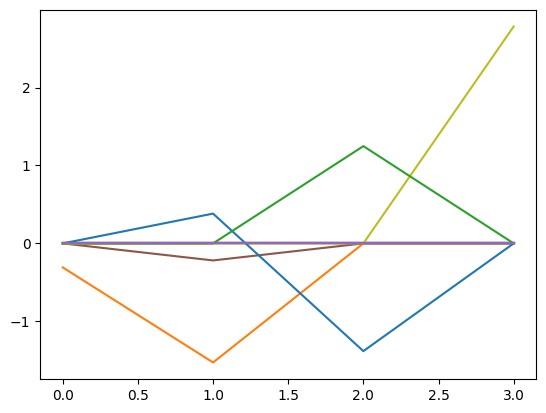

In [74]:
plt.plot(x_trans[:4])